# Lesson 13, Workalong 01: Finding Earthquakes in California

This workalong uses `geopandas` to find earthquakes within California.  It builds from the [lesson 05 warmup](https://github.com/taobrienlbl/advanced_earth_science_data_analysis/blob/8fdbb61bc39b64244f420d446b985a4d27f80df6/lessons/05_multidimensional_arrays_also_plotting/05_warmup_SOLUTION.ipynb), in which we used pandas to find earthquakes from a USGS dataset.  We'll use a similar approach to initially load the same dataset.

In [1]:
""" Import libraries """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy

In [2]:
""" Load the usgs dataset """
dataset_path = "https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/1cc2bc06219f7c15b211629a2aeba7d57e783138/lessons/05_multidimensional_arrays_also_plotting/data/usgs_major_earthquakes_1900-2023.csv"

earthquake_df = pd.read_csv(dataset_path, parse_dates=[0])
earthquake_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-21 21:11:49.950000+00:00,-14.0039,167.1898,188.419,6.1,mww,76.0,26.0,7.076,0.83,...,2023-09-21T23:17:30.631Z,"41 km WSW of Sola, Vanuatu",earthquake,8.86,4.898,0.054,33.0,reviewed,us,us
1,2023-09-20 14:45:58.609000+00:00,-4.5826,-105.6493,10.000,6.0,mww,110.0,208.0,15.828,1.08,...,2023-09-21T21:02:41.950Z,central East Pacific Rise,earthquake,14.99,1.952,0.050,38.0,reviewed,us,us
2,2023-09-18 13:21:23.790000+00:00,26.4336,125.3032,183.483,6.3,mww,113.0,35.0,2.262,1.21,...,2023-09-19T13:29:35.504Z,"180 km N of Hirara, Japan",earthquake,6.53,4.942,0.044,49.0,reviewed,us,us
3,2023-09-13 11:49:15.926000+00:00,-36.2201,-97.9378,10.000,6.1,mww,117.0,37.0,13.309,0.65,...,2023-09-14T11:52:11.466Z,West Chile Rise,earthquake,10.28,1.860,0.050,39.0,reviewed,us,us
4,2023-09-12 11:03:18.873000+00:00,19.2687,121.2178,41.281,6.3,mww,133.0,21.0,4.049,0.96,...,2023-09-18T13:59:24.715Z,"73 km N of Namuac, Philippines",earthquake,8.03,5.112,0.046,46.0,reviewed,us,us


In [3]:
""" Convert the pandas dataframe into a geodataframe """
earthquake_gdf = gpd.GeoDataFrame(
    earthquake_df, 
    geometry=gpd.points_from_xy(earthquake_df.longitude, earthquake_df.latitude),
    crs='EPSG:4326'  # which is the code for WGS84
    )

earthquake_gdf.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2023-09-21 21:11:49.950000+00:00,-14.0039,167.1898,188.419,6.1,mww,76.0,26.0,7.076,0.83,...,"41 km WSW of Sola, Vanuatu",earthquake,8.86,4.898,0.054,33.0,reviewed,us,us,POINT (167.18980 -14.00390)
1,2023-09-20 14:45:58.609000+00:00,-4.5826,-105.6493,10.000,6.0,mww,110.0,208.0,15.828,1.08,...,central East Pacific Rise,earthquake,14.99,1.952,0.050,38.0,reviewed,us,us,POINT (-105.64930 -4.58260)
2,2023-09-18 13:21:23.790000+00:00,26.4336,125.3032,183.483,6.3,mww,113.0,35.0,2.262,1.21,...,"180 km N of Hirara, Japan",earthquake,6.53,4.942,0.044,49.0,reviewed,us,us,POINT (125.30320 26.43360)
3,2023-09-13 11:49:15.926000+00:00,-36.2201,-97.9378,10.000,6.1,mww,117.0,37.0,13.309,0.65,...,West Chile Rise,earthquake,10.28,1.860,0.050,39.0,reviewed,us,us,POINT (-97.93780 -36.22010)
4,2023-09-12 11:03:18.873000+00:00,19.2687,121.2178,41.281,6.3,mww,133.0,21.0,4.049,0.96,...,"73 km N of Namuac, Philippines",earthquake,8.03,5.112,0.046,46.0,reviewed,us,us,POINT (121.21780 19.26870)


<Axes: >

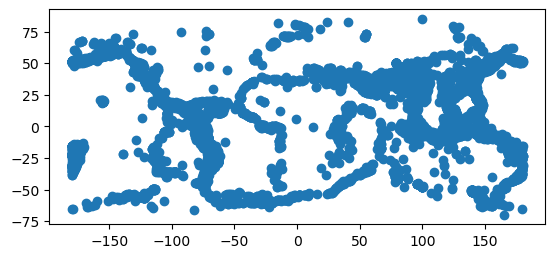

In [4]:
# default plot without any modification
earthquake_gdf.plot()

+a=6378137.0 +proj=robin +lon_0=0 +no_defs


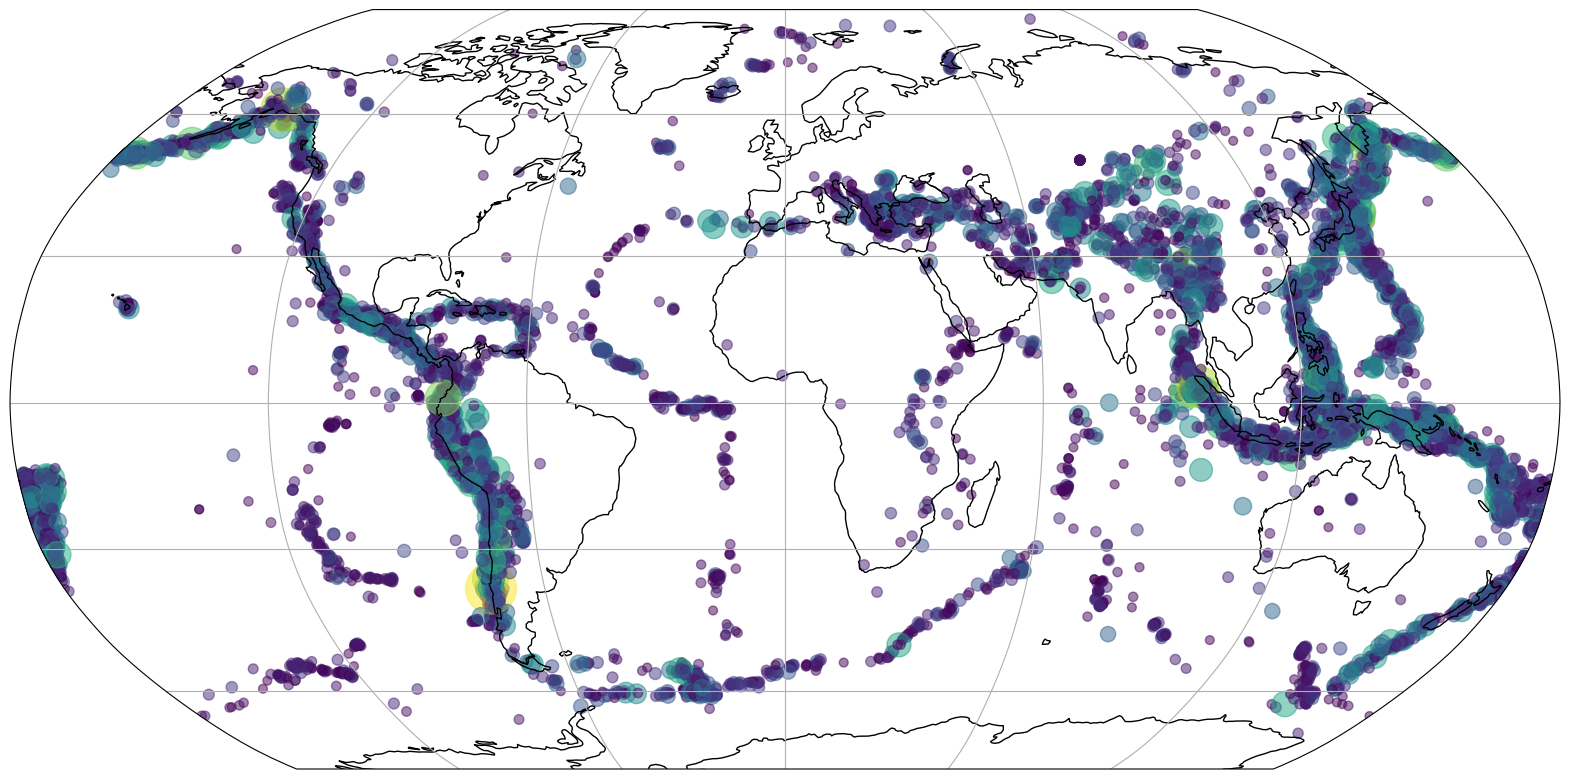

In [6]:
""" Plot the earthquakes by magnitude """
projection = cartopy.crs.Robinson()

# create a figure and axis with defined projection
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': projection})

# convert the projection to a PROJ4 string
ax_proj = ax.projection.proj4_init
print(ax_proj)

# assign this projection to the earthquake data
earthquake_gdf_proj = earthquake_gdf.to_crs(ax_proj)
earthquake_gdf_proj.plot(
    ax=ax, 
    transform=projection, 
    column='mag',
    markersize=np.exp(earthquake_gdf_proj.mag)/10,
    alpha=0.5
    )

# add coastlines
ax.coastlines()
# add gridlines
ax.gridlines()

plt.show()


## State boundaries

The next step involves filtering by state.  While technically we might be able to determine the location using the "place" column in the dataset, we can do better than that by using a shapefile to define the geospatial region we want to search and then using a point-in-polygon method to find earthquake points taht are within that region.

Note that this shapefile dataset was downloaded from  https://www.sciencebase.gov/catalog/item/52c78623e4b060b9ebca5be5 on Tuesday November 28, 2023 at 1:45pm Eastern.

In [7]:
""" Load the state boundary shapefile. """

state_shapefile_path = "https://github.com/taobrienlbl/advanced_earth_science_data_analysis/raw/09188e9e6a0cf230f8473c0ae95d2e1b9079df3a/lessons/13_geospatial_intro/data/tl_2012_us_state.zip"

# load the shapefile
state_gdf = gpd.read_file(state_shapefile_path)
state_gdf.head()

,OBJECTID,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,1,4,9,15,01779782,15,HI,Hawaii,00,G4000,A,1.663425e+10,1.167874e+10,+19.8097670,-155.5061027,2.419034e+06,3.268482e+10,"MULTIPOLYGON (((-17361760.204 2164544.588, -17..."
1,2,3,7,05,00068085,05,AR,Arkansas,00,G4000,A,1.347726e+11,2.959210e+09,+34.8955256,-092.4446262,2.656648e+06,2.053261e+11,"POLYGON ((-10515267.713 4101325.818, -10515269..."
2,3,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,3.141611e+11,7.564385e+08,+34.4346843,-106.1316181,2.900368e+06,4.643927e+11,"POLYGON ((-12138963.727 4106855.170, -12138964..."
3,4,4,8,30,00767982,30,MT,Montana,00,G4000,A,3.769636e+11,3.868565e+09,+47.0511771,-109.6348174,4.607246e+06,8.201836e+11,"POLYGON ((-12727480.235 5886876.586, -12727567..."
4,5,1,2,36,01779796,36,NY,New York,00,G4000,A,1.220579e+11,1.923885e+10,+42.9133974,-075.5962723,3.212630e+06,2.637702e+11,"MULTIPOLYGON (((-8866092.533 5160809.769, -886..."


Since this is a dataframe, we can use pandas features to select rows.  I'm going to pull the row where the "STUSPS" column is "CA".

<Axes: >

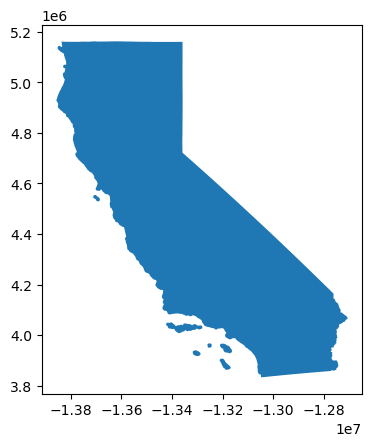

In [9]:
""" Extract the CA row. """

CA_gdf = state_gdf[state_gdf.STUSPS=='CA']
CA_gdf.head()
CA_gdf.plot()

This particular shapefile seems to include coastal waters that are also part of the state (note how the islands look like dots).  That might not be great for some analyses, but for our purposes, that's just fine.

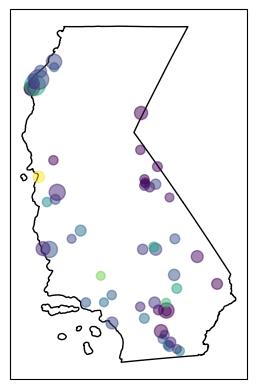

In [13]:
""" Use the CA boundary to clip the earthquakes. """

# convert the boundary shapefile to the projection of earthquake data
CA_gdf_proj = CA_gdf.to_crs(earthquake_gdf_proj.crs)

# clip the earthquakes to the CA boundary
earthquake_gdf_proj_clipped = gpd.clip(earthquake_gdf_proj, CA_gdf_proj)

# plot the boundary and clipped earthquakes
fig, ax = plt.subplots(subplot_kw={'projection': projection})

CA_gdf_proj.plot(ax=ax, facecolor='None', edgecolor='black')

earthquake_gdf_proj_clipped.plot(
    ax=ax, 
    transform=projection, 
    column='mag',
    markersize=np.exp(earthquake_gdf_proj_clipped.mag)/10,
    alpha=0.5
    )

plt.show()

What if we want earthquakes near CA: e.g., within 100 km?  We can inflate (*buffer*) the shapefile boundary to accomplish this.

Note, however, that the shapefile uses a degree-based coordinate system, so we'll *buffer* by degrees, using the fact that 1 degree is approximately 100 km.

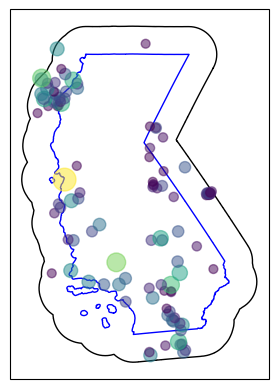

In [16]:
""" Inflate the CA shapefile boundary. """

# inflate the boundary by 100 km
CA_gdf_proj_inflated = CA_gdf_proj.buffer(100*1000)  # 100*1000 m

# clip the earthquakes data using new inflated boundary
earthquake_gdf_proj_clipped_inflated = gpd.clip(earthquake_gdf_proj, CA_gdf_proj_inflated)

# plot the inflated boundary and newly clipped earthquakes
fig, ax = plt.subplots(subplot_kw={'projection': projection})

CA_gdf_proj.plot(ax=ax, facecolor='None', edgecolor='blue')
CA_gdf_proj_inflated.plot(ax=ax, facecolor='None', edgecolor='black')

earthquake_gdf_proj_clipped_inflated.plot(
    ax=ax, 
    transform=projection, 
    column='mag',
    markersize=np.exp(earthquake_gdf_proj_clipped_inflated.mag)/10,
    alpha=0.5
    )

plt.show()

In [19]:
""" Save the inflated boundary to a shapefile for later use. """
CA_gdf_proj_inflated.to_file('CA_boundary_inflated.shp.zip', driver='ESRI Shapefile')

In [18]:
""" Save the clipped earthquakes for later use. """

# make a copy of original file to convert datetime object
CA_earthquake_gdf = earthquake_gdf_proj_clipped_inflated.copy()
CA_earthquake_gdf['time'] = CA_earthquake_gdf['time'].astype(str)

# save to ESRI shapefile in zip format
CA_earthquake_gdf.to_file('CA_earthquake.zip', driver='ESRI Shapefile')

C:\Users\CRH\AppData\Local\Temp\ipykernel_22108\1796203129.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  CA_earthquake_gdf.to_file('CA_earthquake.zip', driver='ESRI Shapefile')
